<a href="https://colab.research.google.com/github/sofit-c23-ps233/SoFit-MachineLearning/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
# I see that the gender is stil in "object" datatypes, let's convert it to an integer

df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0})

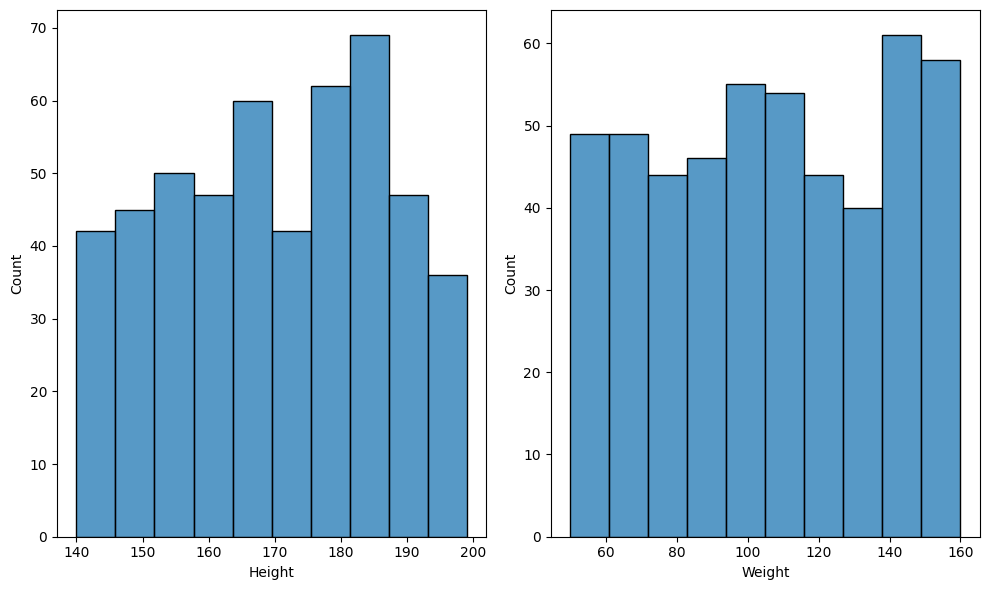

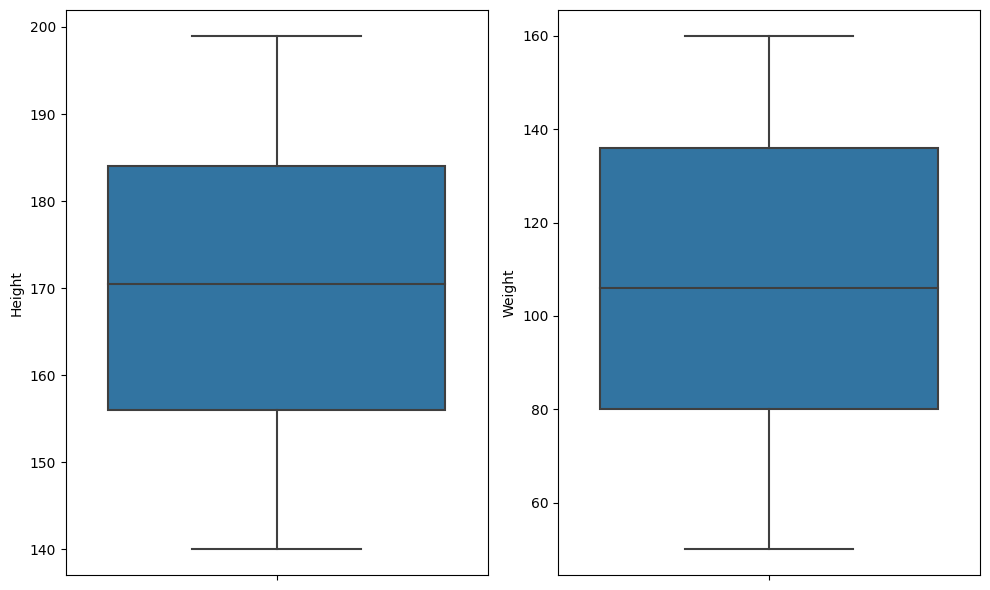

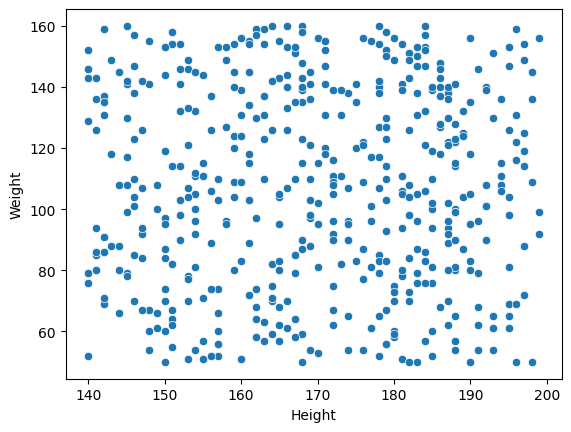

<ipython-input-5-54c7994dfbcc>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Height', shade=True)
<ipython-input-5-54c7994dfbcc>:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Weight', shade=True)


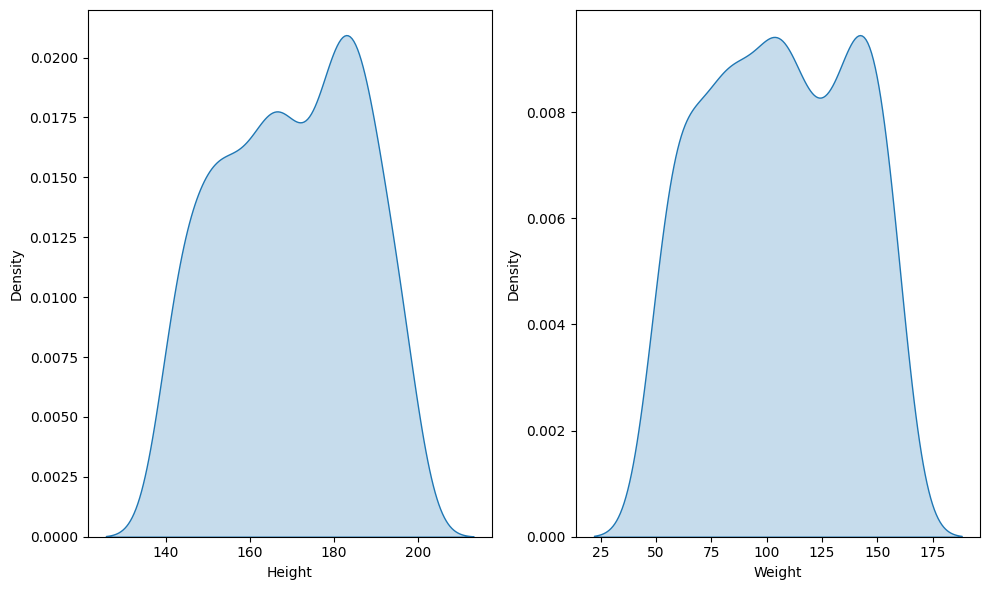

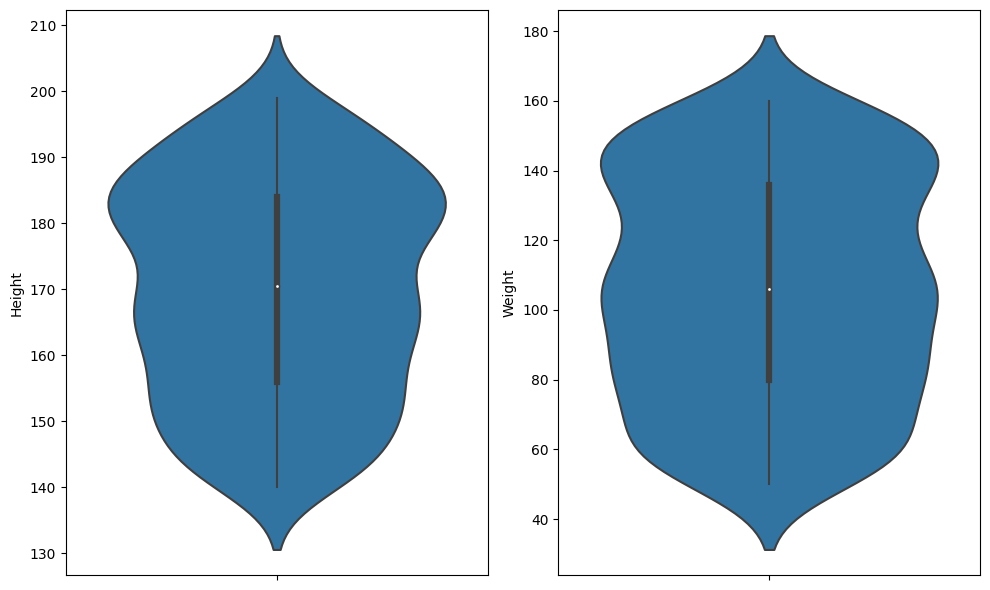

In [5]:
# I want to visualize the distribution first to check

# Histogram
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Height')
plt.xlabel('Height')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Weight')
plt.xlabel('Weight')

plt.tight_layout()
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Height')
plt.ylabel('Height')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Weight')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

# Scatter plot
sns.scatterplot(data=df, x='Height', y='Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Height', shade=True)
plt.xlabel('Height')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Weight', shade=True)
plt.xlabel('Weight')

plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='Height')
plt.ylabel('Height')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='Weight')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

As we can see, the data is not normally distributed, So I guess we will use the z-score normalization method

In [6]:
# Let's "normalize" this dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Height_normalized", "Weight_normalized"]] = scaler.fit_transform(df[["Height", "Weight"]])


In [7]:
# Drop the Height and Weight
df.drop(columns=["Height", "Weight"], inplace=True)

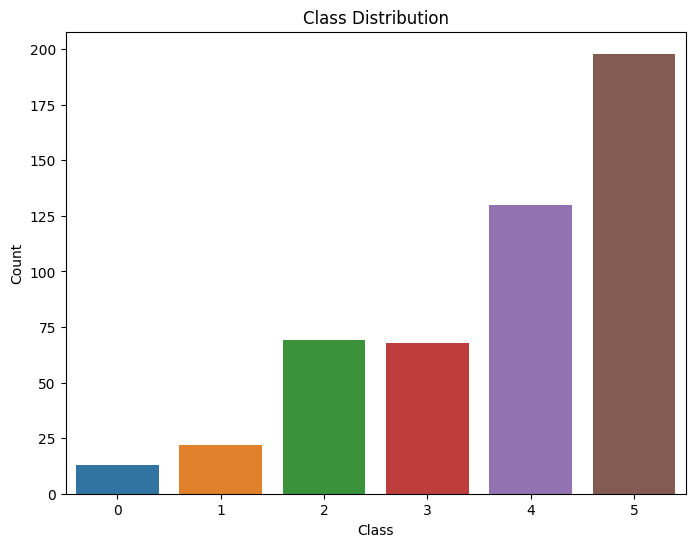

In [8]:
# Before doing the modelling, I'll check whether the data is balanced or not

# Count the occurrences of each class
class_counts = df['Index'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Index')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [9]:
df.columns

Index(['Gender', 'Index', 'Height_normalized', 'Weight_normalized'], dtype='object')

In [10]:
# This dataset is highly unbalanced, Let's try to balanced it using SMOTE

from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate the features and the target
X = df.drop(columns=["Index"]) # Features
y = df["Index"]

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Index'])], axis=1)

# Check the class distribution after applying SMOTE
print(df_resampled['Index'].value_counts())

4    198
2    198
3    198
5    198
1    198
0    198
Name: Index, dtype: int64


In [11]:
# Okay, now we have the balanced dataset in df_resampled

df_resampled.head()

,Gender,Height_normalized,Weight_normalized,Index
0,1,0.247939,-0.309117,4
1,1,1.164872,-0.587322,2
2,0,0.920357,0.123647,4
3,0,1.531645,-0.061823,3
4,1,-1.280283,-1.391027,3


In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# Create a DataFrame with the given data
df = df_resampled

# Preprocessing
X = df[['Gender', 'Height_normalized', 'Weight_normalized']]  # Features
y = df['Index']  # Target variable

# Encode categorical variables
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))  # You have 6 classes in 'Index'

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


<ipython-input-12-704083eef51e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = label_encoder.fit_transform(X['Gender'])


Epoch 1/100
30/30 [==============================] - 3s 29ms/step - loss: 1.7448 - accuracy: 0.2042 - val_loss: 1.6798 - val_accuracy: 0.2857
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.6430 - accuracy: 0.3011 - val_loss: 1.5941 - val_accuracy: 0.3193
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 1.5552 - accuracy: 0.3295 - val_loss: 1.5098 - val_accuracy: 0.3445
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 1.4664 - accuracy: 0.3537 - val_loss: 1.4244 - val_accuracy: 0.3613
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 1.3779 - accuracy: 0.3737 - val_loss: 1.3437 - val_accuracy: 0.3824
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 1.2957 - accuracy: 0.4105 - val_loss: 1.2728 - val_accuracy: 0.3908
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 1.2232 - accuracy: 0.4389 - val_loss: 1.2081 - val_accuracy: 0.4622
Epoch 8/100


In [18]:
model.save('model.h5')

In [19]:
from google.colab import files

# Download the saved model
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>